# Ley de Benford y Detección de Fraude
## 1. Ley de Benford
La Ley de Benford (o distribución de Benford) establece que en muchos conjuntos de datos numéricos, los dígitos líderes (los primeros dígitos) no se distribuyen uniformemente. 
+ En cambio, hay una tendencia para que ciertos dígitos, especialmente el 1, aparezcan como el primer dígito más frecuentemente que otros. De acuerdo con la ley de Benford, aproximadamente:

    + El 30.1% de los números deberían tener un 1 como primer dígito.
    + El 17.6% deberían tener un 2, y así sucesivamente.

Aplicación en auditorías:
+ En auditorías, la ley de Benford es utilizada para analizar grandes conjuntos de datos financieros (como cheques, facturas o informes de ventas) y detectar patrones sospechosos. 
    + Si los datos no siguen la distribución de Benford, podría ser una señal de manipulación o fraude.

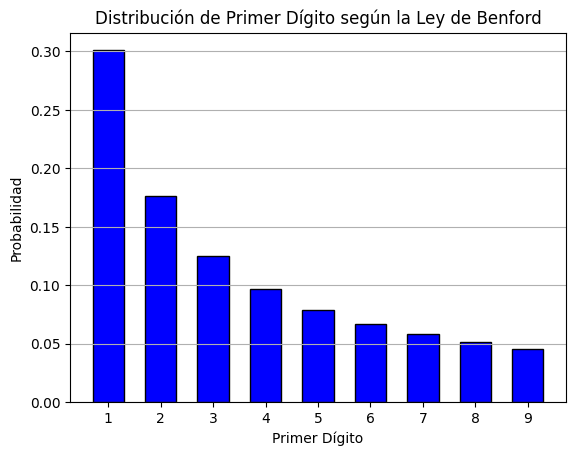

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cálculo de probabilidades según la Ley de Benford
def benford_probabilities():
    digits = np.arange(1, 10)
    probabilities = np.log10(1 + 1 / digits)
    return digits, probabilities

# Graficar las probabilidades
def plot_benford():
    digits, probabilities = benford_probabilities()
    
    plt.bar(digits, probabilities, width=0.6, color='blue', edgecolor='black')
    plt.xlabel('Primer Dígito')
    plt.ylabel('Probabilidad')
    plt.title('Distribución de Primer Dígito según la Ley de Benford')
    plt.xticks(digits)
    plt.grid(axis='y')
    plt.show()

plot_benford()


**Cómo se aplica la ley de Benford:**
1. Hipótesis nula (H₀): Los dígitos líderes de los cheques siguen la distribución de Benford.
2. Hipótesis alternativa (H₁): Los dígitos líderes de los cheques no siguen la distribución de Benford.

+ Luego se realiza una prueba estadística, como la prueba Chi-cuadrado de bondad de ajuste, 
    + para comparar las frecuencias observadas con las frecuencias esperadas de acuerdo con la ley de Benford.

__________________________________________________________________________________________________________________________________________________________________

## 2. Detección de Fraude

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Proporciones teóricas de Benford (para dígitos 1-9)
benford_probs = np.array([0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046])

# Proporciones observadas para los dígitos 1-9 (eliminando el 0)
observed_probs = np.array([0.000, 0.019, 0.000, 0.097, 0.612, 0.233, 0.010, 0.029, 0.000])

# Convertimos las proporciones observadas a frecuencias esperadas para 784 cheques
n_cheques = 784
observed_freq = observed_probs * n_cheques
expected_freq = benford_probs * n_cheques

print(f"Observed:{sum(observed_freq)}, Expected:{sum(expected_freq)}")

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")


Observed:784.0, Expected:784.0
Estadístico Chi-cuadrado: 3660.1921
Valor p: 0.0000


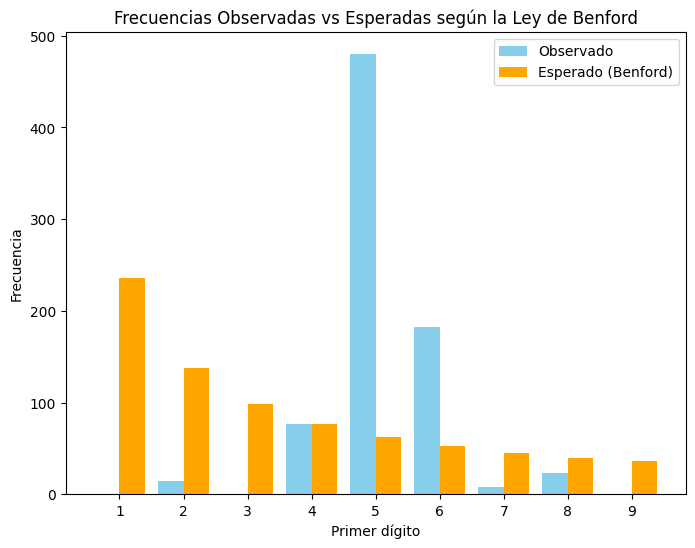

Estadístico Chi-cuadrado: 3660.1921
Valor p: 0.0000
Se rechaza la hipótesis nula: Los dígitos líderes no siguen la Ley de Benford.


In [9]:

# Graficar las frecuencias observadas y esperadas
digits = np.arange(1, 10)
plt.figure(figsize=(8, 6))
plt.bar(digits - 0.2, observed_freq, width=0.4, label='Observado', color='skyblue')
plt.bar(digits + 0.2, expected_freq, width=0.4, label='Esperado (Benford)', color='orange')
plt.xlabel('Primer dígito')
plt.ylabel('Frecuencia')
plt.title('Frecuencias Observadas vs Esperadas según la Ley de Benford')
plt.xticks(digits)
plt.legend()
plt.show()

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Los dígitos líderes parecen seguir la Ley de Benford.")
else:
    print("Se rechaza la hipótesis nula: Los dígitos líderes no siguen la Ley de Benford.")


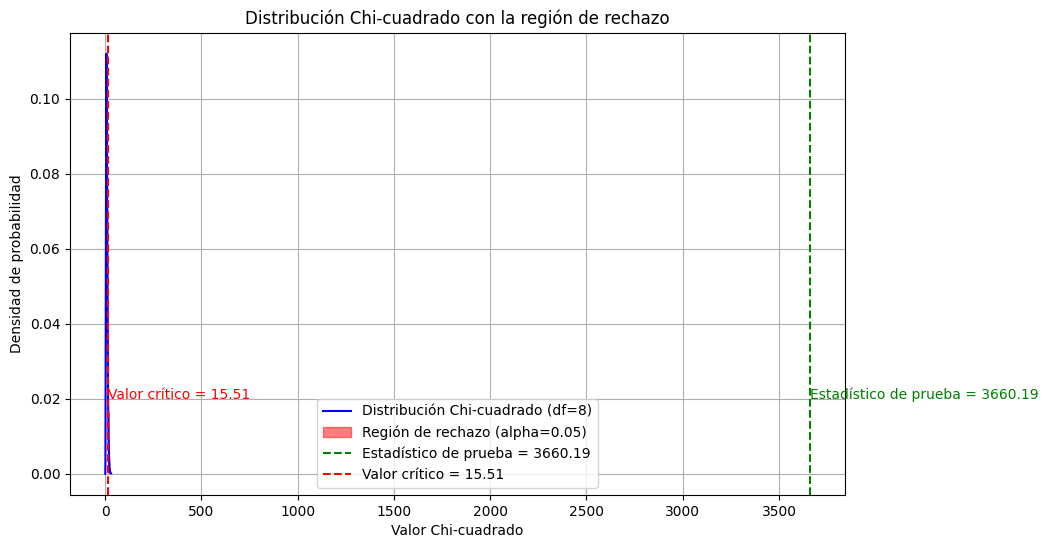

Valor p: 0.0000
Se rechaza la hipótesis nula: Los dígitos líderes no siguen la Ley de Benford.


In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parámetros de la prueba
alpha = 0.05  # Nivel de significancia
df = len(benford_probs) - 1  # Grados de libertad

# Crear valores para la distribución Chi-cuadrado
x = np.linspace(0, 30, 1000)
chi2_dist = stats.chi2.pdf(x, df)

# Estadístico de prueba y valor p obtenidos previamente
chi2_stat, p_value = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)

# Gráfico de la distribución Chi-cuadrado
plt.figure(figsize=(10, 6))
plt.plot(x, chi2_dist, label=f'Distribución Chi-cuadrado (df={df})', color='blue')

# Región de rechazo: Valor crítico Chi-cuadrado
chi2_critical = stats.chi2.ppf(1 - alpha, df)

# Sombrear la región de rechazo
plt.fill_between(x, 0, chi2_dist, where=(x >= chi2_critical), color='red', alpha=0.5, label=f'Región de rechazo (alpha={alpha})')

# Dibujar el estadístico de prueba
plt.axvline(chi2_stat, color='green', linestyle='--', label=f'Estadístico de prueba = {chi2_stat:.2f}')
plt.axvline(chi2_critical, color='red', linestyle='--', label=f'Valor crítico = {chi2_critical:.2f}')

# Añadir texto al gráfico
plt.text(chi2_stat + 0.5, 0.02, f'Estadístico de prueba = {chi2_stat:.2f}', color='green')
plt.text(chi2_critical + 0.5, 0.02, f'Valor crítico = {chi2_critical:.2f}', color='red')

# Configuración del gráfico
plt.title('Distribución Chi-cuadrado con la región de rechazo')
plt.xlabel('Valor Chi-cuadrado')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar el valor p
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value > alpha:
    print("No se rechaza la hipótesis nula: Los dígitos líderes parecen seguir la Ley de Benford.")
else:
    print("Se rechaza la hipótesis nula: Los dígitos líderes no siguen la Ley de Benford.")
